In [9]:
from gasp import responses, simulation

In [10]:
width = 256
height = 256

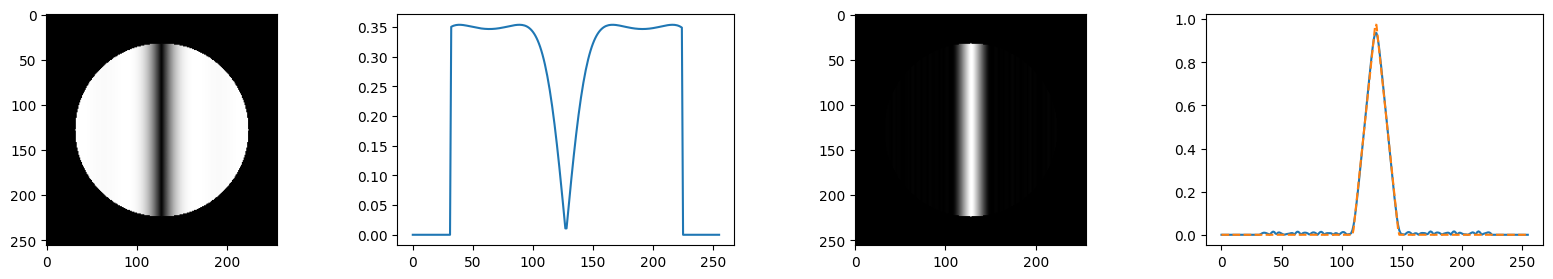

In [11]:
D = responses.triangle_periodic(width, 1000, 110, 38)
Ic, M = simulation.simulate_gasp(D)
simulation.view_gasp(Ic, M, D)

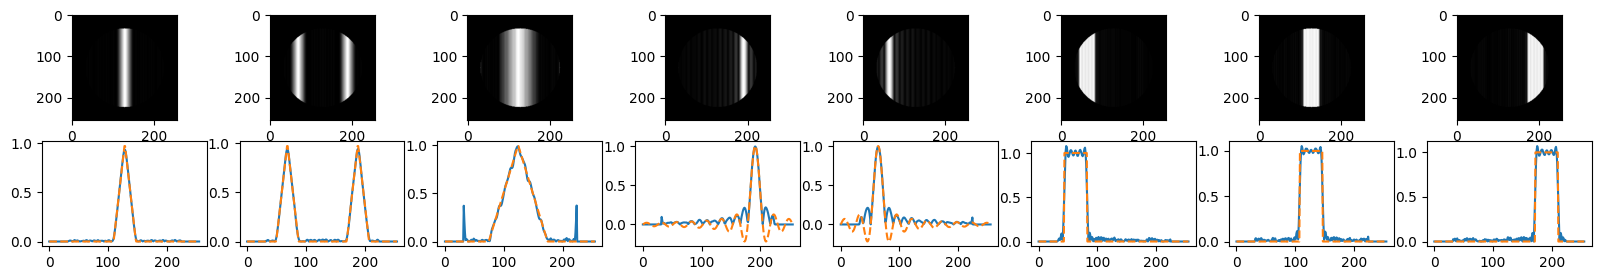

In [12]:
D = []
D.append(responses.triangle_periodic(width, 1000, 110, 38))
D.append(responses.triangle_periodic(width, 120, 50, 38))
D.append(responses.triangle_periodic(width, 1000, 75, 100))
D.append(responses.sinc(width, bw=0.1, shift=0.5))
D.append(responses.sinc(width, bw=0.1, shift=-0.5))
D.append(responses.square(width, bw=0.15, shift=-0.25))
D.append(responses.square(width, bw=0.15, shift=0))
D.append(responses.square(width, bw=0.15, shift=0.25))


G = []
for d in D:
    Ic, M = simulation.simulate_gasp(d)
    G.append(Ic)

simulation.view_gasp_analsys(G, D)
